# Alcohol Use Effect on Students

## Introduction
Does Alcohol effect students' GPA? Is there different alcohol consumption behaivor among students? These are the quetions that might trigger the idea of what the relationship between age and alcohol use is or what the reletionship of gender and alcohol use is?

The data were obtained in a survey of students math courses in secondary school. It contains a lot of interesting social, gender and study information about students which can be used for some EDA or try to predict students final grade. I am going to use gender, age, grade and weekly alcohol consumption and compare various senarios to see what are the effectes among them.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Let's begin with the idea of alcohol consumption between female and male students and see how that distributes among our data sets looks like.

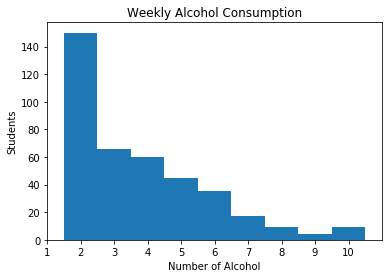

In [30]:
plt.hist(df['alcohol_use'], bins=np.arange(2,12)-.5)
plt.title('Weekly Alcohol Consumption')
plt.ylabel('Students')
plt.xlabel('Number of Alcohol')
plt.xticks(np.arange(11))
plt.xlim(1,11)
plt.show()

As above figure illustrates the number of alcohol consumbtion mostly decreasing and distribution looks like an exponential distribution.

By breaking down the above figure into two category and comparing the alcohol use between female and male students, the distributions stays the same as above for female students but for male students the distribution have three peak points instead of two. Although the number of female students who drink between 2 to 5 are higher than male students, going to the left of histgram the number of male students increases.

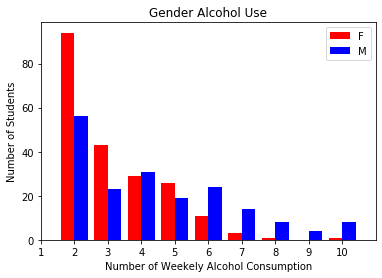

In [35]:
x1 = df[df['sex'] == 'F']['alcohol_use']
x2 = df[df['sex'] == 'M']['alcohol_use']

plt.hist([x1,x2], color=['red','blue'], bins=np.arange(2,12)-.5, label=['F','M'])
plt.title('Gender Alcohol Use')
plt.xlabel('Number of Weekely Alcohol Consumption')
plt.ylabel('Number of Students')
plt.xticks(np.arange(11))
plt.xlim(1,11)
plt.legend()
plt.show()

In [10]:
df['alcohol_use'] = df['Dalc'] + df['Walc']
df.groupby('sex')['alcohol_use'].mean()

sex
F    3.211538
M    4.395722
Name: alcohol_use, dtype: float64

By looking at the average of alcohol use beetween female and male, it derives that male students drink one alcohol in average more than female students.

How about age? Does age impact on alcohol consumption?

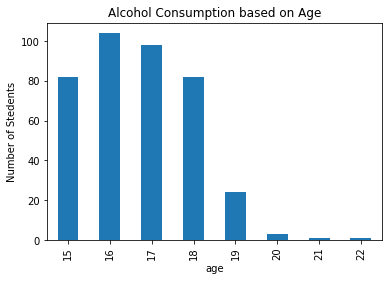

In [73]:
df.groupby(['age']).count()['alcohol_use'].plot(kind='bar')
plt.ylabel('Number of Stedents')
plt.title('Alcohol Consumption based on Age')
plt.show()

Supprisingly, the youger the students are, the more they drink. The distribution of alcohol consumption based on age looks like gamma distribution.
How about if we combine both age and gender and see how that affects the result.

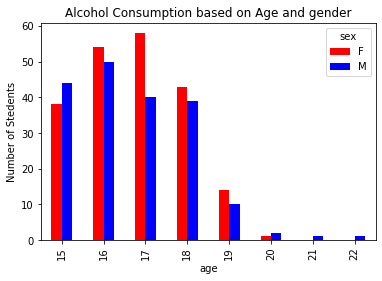

In [74]:
df.groupby(['age','sex']).count()['alcohol_use'].unstack().plot(kind='bar',color=('red','blue'))
plt.ylabel('Number of Stedents')
plt.title('Alcohol Consumption based on Age and gender')
plt.show()

In [14]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

At the end, let's dig in to that if the consumption of alcohol does have any impact on Students GPA.

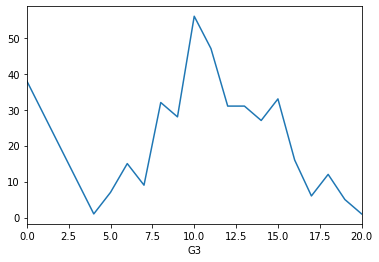

In [118]:
df.groupby('G3').count()['alcohol_use'].plot()

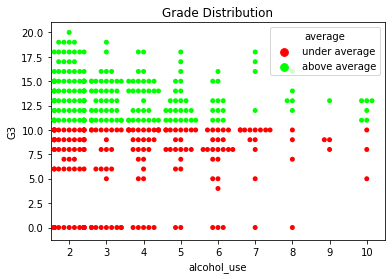

In [79]:
import seaborn as sns
 
df['average'] = ['above average' if i > df.G3.mean()  else 'under average' for i in df.G3]
# Grouped boxplot
sns.swarmplot(x="alcohol_use", y="G3", hue = 'average',data= df,palette={'above average':'lime', 'under average': 'red'})
plt.title('Grade Distribution')
plt.show()
#plt.boxplot(columns='alcohol_use',by='G3')

As it can be seen swarm plot, there are more student who takes highest grade consumes alcohol only 2 times in a week and the numbers of students gradually decrease. However, this does really apply that less alcohol consumption makes your grade higher due to two reasons. First, the number of students with consuming 2 alcohol is much higher so therefore there are more students with two alcohol consumption distribution. Secondly, there are also a lot of students with grades less than average who consumed two alcohols per week.

Let take a look at two different samples and examine our final conculsion to see whether really alcohol consumption does have any effects on students' grade or not by performing t-test.
I will take two samples, one with grades over the average and the other one with grades below the average.

In [72]:
from scipy.stats import ttest_ind

average = df['G3'].mean()
sample1 = np.random.choice(df.groupby('alcohol_use').count()['G3']<average , 50, replace=True)
sample2 = np.random.choice(df.groupby('alcohol_use').count()['G3']>average , 50, replace=True)

print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=4.636970189392361, pvalue=1.1160517004656278e-05)


The p-value of "1.1160517004656278e-05" rejects the hypothesis that alcohol consumption effects the grade and we could "scientifically" say that "there is no difference"

Although, I just dig into the the effects of alcohol consumption based on age, gender and grade, the data sets have a lot of potentional for finding the effect of romantic relationship on alcohol use or students health versus alcohol consumption.